# DATA PREPROCESSING

In [35]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(r'C:\Users\Hp\Downloads\explore-sed-e91f95f5477f.json', scope)
gc = gspread.authorize(creds)

Mavis_Records = "exploreSED"

ans_sheet = gc.open(Mavis_Records).worksheet('ANS')
qtn_sheet = gc.open(Mavis_Records).worksheet('QTN')

# Get the data from both sheets
ans_data = ans_sheet.get_all_records()
qtn_data = qtn_sheet.get_all_records() 

# Create a Pandas DataFrame from the data
ans_df = pd.DataFrame(ans_data)
qtn_df = pd.DataFrame(qtn_data)

# Merge the dataframes on 'Question_ID' to include 'Question_Title'
merged_df = ans_df.merge(qtn_df[['Question_ID', 'Question_Title']], on='Question_ID')

# Filter the DataFrame to only include rows where 'Response' is not 'No Response'
filtered_df = merged_df[merged_df['Response'] != 'No Response']

# List unique Question_IDs in ascending order as a row
# unique_question_ids = sorted(filtered_df['Question_ID'].unique())
# unique_question_titles = sorted(filtered_df['Question_Title'].unique())


# List unique Student_IDs as a column
# unique_student_ids = filtered_df['STUDENT_ID'].unique()

# Create a new DataFrame in matrix format
# transformed_data = []

# for student_id in unique_student_ids:
#     student_responses = filtered_df[filtered_df['STUDENT_ID'] == student_id].set_index('Question_Title')['Response'].reindex(unique_question_ids).values
#     transformed_data.append([student_id] + student_responses.tolist())

# Create a new DataFrame with the matrix format
# transformed_data_df = pd.DataFrame(transformed_data, columns=['STUDENT_ID'] + unique_question_titles)

# Print the new DataFrame
# print(transformed_data)
print(filtered_df)

              STUDENT_ID Question_ID                      Response  \
0    1064892608008167495       PD007                             B   
1     932982740821872700       PD007                     Satisfied   
2     829689559943479296       PD007                             b   
3     914658875834241054       PD007                             B   
4     880684860400873505       PD007                             A   
..                   ...         ...                           ...   
350   872011308793471036       PL001                             D   
356  1065564948048138290       PL001                   h. WhatsApp   
358  1067383972499312671       PL001                      Ac, h, i   
360   922614479542452284       PL001                             D   
361  1064902702372507698       PL001  Twitter \nYouTube \nWhatsApp   

               TimeStamp       Question_Title  
0    2023-11-04 18:32:05  course_satisfaction  
1    2023-11-04 18:32:05  course_satisfaction  
2    2023-11-04

In [31]:
from oauth2client.service_account import ServiceAccountCredentials
from gspread_pandas import Spread

scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(r'C:\Users\Hp\Downloads\explore-sed-e91f95f5477f.json', scope)
gc = gspread.authorize(creds)

Mavis_Records = "exploreSED"
cleaned_data = gc.open(Mavis_Records).worksheet('Copy of ANS 2')

cleaned_data.clear()

# Copy the DataFrame to avoid modifying the original
modified_df = filtered_df.copy()

# Convert 'STUDENT_ID' to string in the DataFrame
modified_df['STUDENT_ID'] = modified_df['STUDENT_ID'].astype(str)

# Convert your DataFrame to a list of lists
data = modified_df.values.tolist()

# Convert your DataFrame to a list of lists
# data = filtered_df.values.tolist()

header = filtered_df.columns.tolist()
cleaned_data.insert_rows([header], 1)

# Write the data to the worksheet starting from the second row (index 2)
cleaned_data.insert_rows(data, 2)



# Pivot the DataFrame to have students as rows and questions as columns
pivoted_df = filtered_df.pivot(index='STUDENT_ID', columns='Question_Title', values='Response')

# Fill NaN values with 'No Response'
pivoted_df = pivoted_df.fillna('No Response')

# Print the pivoted DataFrame
print(pivoted_df)

Question_Title                            access_to_additional_support  \
STUDENT_ID                                                               
829689559943479296                                                   a   
872011308793471036                                                   B   
880684860400873505                                                   B   
895700412106149899                                         No Response   
907555122723319858                                         No Response   
914658875834241054                                                   B   
922614479542452284                                                   C   
932982740821872700               No, I am not aware of thwse resources   
1030009694212870144                              c. No. I am not aware   
1037395744786747412                                        No Response   
1040938229513343056                                        No Response   
1064493525137371176                   

In [64]:
pivoted_df['access_to_additional_support'] = pivoted_df['access_to_additional_support'].replace({'a': 'Yes. I am aware', 'A': 'Yes. I am aware',
                                                                                                 'b': 'I have limited awareness and would like more information',
                                                                                                 'B': 'I have limited awareness and would like more information', 
                                                                                                 'b I have limited awareness and would like more information': 'I have limited awareness and would like more information',
                                                                                                 'c': 'No. I am not aware', 'C': 'No. I am not aware', 
                                                                                                 'No, I am not aware of thwse resources': 'No. I am not aware',
                                                                                                 'c. No. I am not aware': 'No. I am not aware',
                                                                                                 'c. Full-time employment': 'No. I am not aware',
                                                                                                 'No. I am not aware of these resources': 'No. I am not aware'})
print(pivoted_df['access_to_additional_support'])

STUDENT_ID
829689559943479296                                       Yes. I am aware
872011308793471036     I have limited awareness and would like more i...
880684860400873505     I have limited awareness and would like more i...
895700412106149899                                           No Response
907555122723319858                                           No Response
914658875834241054     I have limited awareness and would like more i...
922614479542452284                                    No. I am not aware
932982740821872700                                    No. I am not aware
1030009694212870144                                   No. I am not aware
1037395744786747412                                          No Response
1040938229513343056                                          No Response
1064493525137371176                                          No Response
1064892608008167495    I have limited awareness and would like more i...
1064902702372507698    I have limited aw

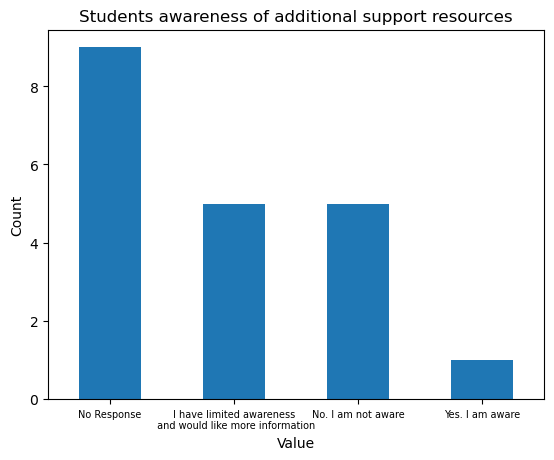

No Response                                                 9
I have limited awareness and would like more information    5
No. I am not aware                                          5
Yes. I am aware                                             1
Name: access_to_additional_support, dtype: int64


In [77]:
awareness_count = pivoted_df['access_to_additional_support'].value_counts()

# Plot the count in a bar graph
ax = awareness_count.plot(kind='bar', rot=0) 
ax.set_title('Students awareness of additional support resources')
ax.set_xlabel('Value')
ax.set_ylabel('Count')

ax.set_xticklabels([text[:24] + '\n' + text[24:] for text in count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=7)

plt.show()

print(awareness_count)

In [72]:
print(pivoted_df['age'].unique())

['No Response' 'E' 'C' 'b' '36-40' 'g' 'd.' 'c. 26-30' 'c.' 'D' 'i']


In [75]:
pivoted_df['age'] = pivoted_df['age'].replace({'a': '16-20', 'b': '21-25', 'c': '26-30', 'c. 26-30': '26-30', 'c.': '26-30', 
                                               'C': '26-30', 'd.': '31-35', 'd': '31-35', 'D': '31-35', 'e': '36-40', 
                                               'E': '36-40', 'f': '41-45', 'g': '46-50', 'h': '51-55', 'i': '56-60'})
print(pivoted_df['age'])

STUDENT_ID
829689559943479296     No Response
872011308793471036           36-40
880684860400873505           26-30
895700412106149899     No Response
907555122723319858           21-25
914658875834241054           26-30
922614479542452284     No Response
932982740821872700           36-40
1030009694212870144          46-50
1037395744786747412    No Response
1040938229513343056    No Response
1064493525137371176          31-35
1064892608008167495          26-30
1064902702372507698          26-30
1065564948048138290          26-30
1065568388115595284          31-35
1065924770442522674    No Response
1065948441353658388          56-60
1066024418087800892    No Response
1067383972499312671    No Response
Name: age, dtype: object


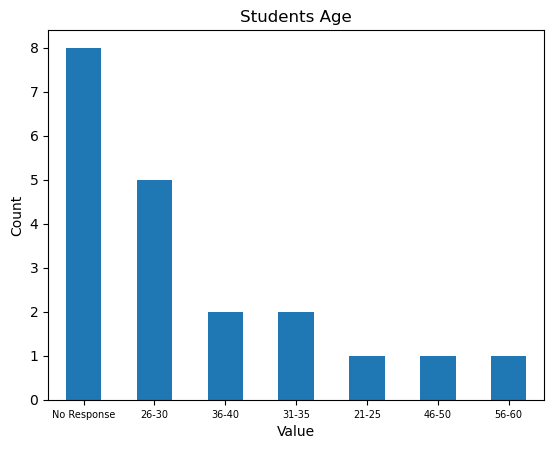

No Response    8
26-30          5
36-40          2
31-35          2
21-25          1
46-50          1
56-60          1
Name: age, dtype: int64


In [81]:
age_count = pivoted_df['age'].value_counts()

# Plot the count in a bar graph
age = age_count.plot(kind='bar', rot=0) 
age.set_title('Students Age')
age.set_xlabel('Value')
age.set_ylabel('Count')

# age.set_xticklabels([text[:24] + '\n' + text[24:] for text in count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=7)

plt.show()

print(age_count)

In [83]:
print(pivoted_df['career_aspiration'].unique())

['d' 'No Response' 'D' 'I have limited awareness'
 'Business Analyst or Data Scientist' 'd. Data Scientist'
 'd. Data scientist' 'c']


In [84]:
pivoted_df['career_aspiration'] = pivoted_df['career_aspiration'].replace({'a': 'Business Analyst', 'b': 'Data Analyst', 'I have limited awareness': 'Data Analyst',
                                                                           'c': 'Data Engineer', 'd': 'Data Scientist', 'd. Data Scientist': 'Data Scientist', 
                                                                           'd. Data scientist': 'Data Scientist', 'D': 'Data Scientist', 'e': 'DevOps', 
                                                                           'f': 'Entrepreneur', 'g': 'Software Engineer', 'h': 'Others', 
                                                                           'Business Analyst or Data Scientist': 'Business Analyst'})
print(pivoted_df['career_aspiration'])

STUDENT_ID
829689559943479296       Data Scientist
872011308793471036          No Response
880684860400873505       Data Scientist
895700412106149899         Data Analyst
907555122723319858       Data Scientist
914658875834241054       Data Scientist
922614479542452284          No Response
932982740821872700     Business Analyst
1030009694212870144      Data Scientist
1037395744786747412      Data Scientist
1040938229513343056         No Response
1064493525137371176         No Response
1064892608008167495      Data Scientist
1064902702372507698         No Response
1065564948048138290      Data Scientist
1065568388115595284         No Response
1065924770442522674         No Response
1065948441353658388         No Response
1066024418087800892         No Response
1067383972499312671       Data Engineer
Name: career_aspiration, dtype: object


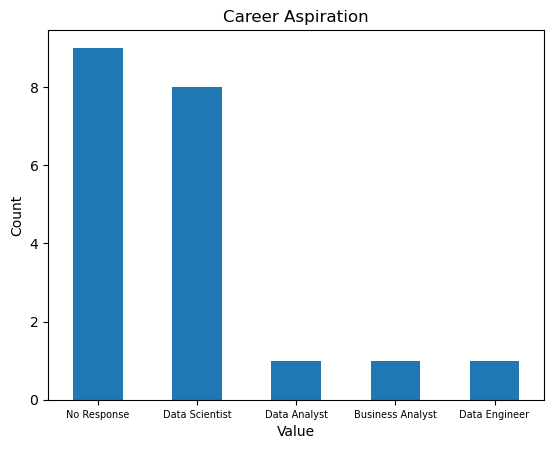

No Response         9
Data Scientist      8
Data Analyst        1
Business Analyst    1
Data Engineer       1
Name: career_aspiration, dtype: int64


In [85]:
career_count = pivoted_df['career_aspiration'].value_counts()

# Plot the count in a bar graph
career = career_count.plot(kind='bar', rot=0) 
career.set_title('Career Aspiration')
career.set_xlabel('Value')
career.set_ylabel('Count')

# age.set_xticklabels([text[:24] + '\n' + text[24:] for text in count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=7)

plt.show()

print(career_count)

In [87]:
print(pivoted_df['career_sector'].unique())

['No Response' 'Business' 'Automotive' 'A'
 'Healthcare. Finance. Military. Business' 'Telecom' 'Education'
 'No, any sector is fine' 'Healthcare' 'C']


In [88]:
pivoted_df['career_sector'] = pivoted_df['career_sector'].replace({'A': 'Finance', 'No, any sector is fine': 'Open to any sector',
                                                                   'Healthcare. Finance. Military. Business': 'Open to any sector',
                                                                  'C': 'Military'})
print(pivoted_df['career_sector'])

STUDENT_ID
829689559943479296            No Response
872011308793471036            No Response
880684860400873505               Business
895700412106149899            No Response
907555122723319858            No Response
914658875834241054             Automotive
922614479542452284                Finance
932982740821872700     Open to any sector
1030009694212870144               Telecom
1037395744786747412           No Response
1040938229513343056           No Response
1064493525137371176           No Response
1064892608008167495             Education
1064902702372507698    Open to any sector
1065564948048138290            Healthcare
1065568388115595284              Military
1065924770442522674           No Response
1065948441353658388           No Response
1066024418087800892           No Response
1067383972499312671           No Response
Name: career_sector, dtype: object


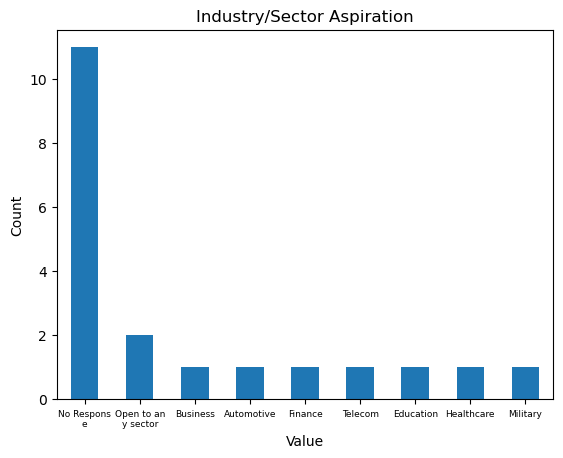

No Response           11
Open to any sector     2
Business               1
Automotive             1
Finance                1
Telecom                1
Education              1
Healthcare             1
Military               1
Name: career_sector, dtype: int64


In [94]:
sector_count = pivoted_df['career_sector'].value_counts()

# Plot the count in a bar graph
sector = sector_count.plot(kind='bar', rot=0) 
sector.set_title('Industry/Sector Aspiration')
sector.set_xlabel('Value')
sector.set_ylabel('Count')

sector.set_xticklabels([text[:10] + '\n' + text[10:] for text in sector_count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=6.5)

plt.show()

print(sector_count)

In [95]:
print(pivoted_df['course_confidence'].unique())

['b' 'No Response' 'B' 'Highly likely' 'a. Highly likely' 'A']


In [96]:
pivoted_df['course_confidence'] = pivoted_df['course_confidence'].replace({'a': 'Highly likely', 'A': 'Highly likely', 
                                                                           'a. Highly likely': 'Highly likely', 'b': 'Likely', 
                                                                           'B': 'Likely', 'c': 'Neutral', 'd': 'Unlikely', 
                                                                           'e': 'Highly unlikely'})
print(pivoted_df['course_confidence'])

STUDENT_ID
829689559943479296            Likely
872011308793471036       No Response
880684860400873505       No Response
895700412106149899       No Response
907555122723319858       No Response
914658875834241054            Likely
922614479542452284            Likely
932982740821872700     Highly likely
1030009694212870144    Highly likely
1037395744786747412      No Response
1040938229513343056      No Response
1064493525137371176      No Response
1064892608008167495      No Response
1064902702372507698      No Response
1065564948048138290    Highly likely
1065568388115595284    Highly likely
1065924770442522674      No Response
1065948441353658388      No Response
1066024418087800892           Likely
1067383972499312671      No Response
Name: course_confidence, dtype: object


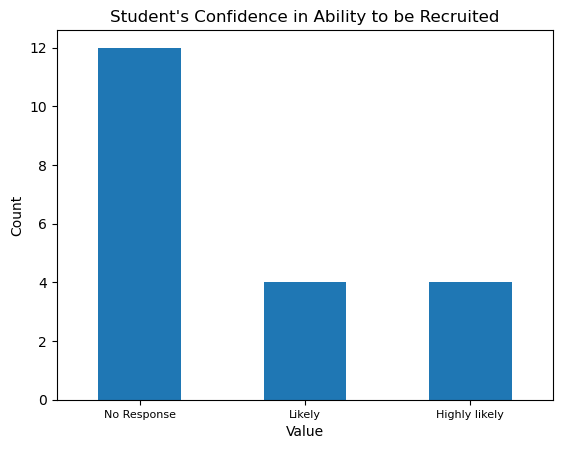

No Response      12
Likely            4
Highly likely     4
Name: course_confidence, dtype: int64


In [101]:
recruitment_count = pivoted_df['course_confidence'].value_counts()

# Plot the count in a bar graph
recruitment = recruitment_count.plot(kind='bar', rot=0) 
recruitment.set_title('Student\'s Confidence in Ability to be Recruited')
recruitment.set_xlabel('Value')
recruitment.set_ylabel('Count')

# recruitment.set_xticklabels([text[:11] + '\n' + text[11:] for text in recruitment_count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=8)

plt.show()

print(recruitment_count)

In [103]:
print(pivoted_df['course_satisfaction'].unique())

['b' 'No Response' 'A' 'Satisfied' 'B' 'a. Very Satisfied']


In [104]:
pivoted_df['course_satisfaction'] = pivoted_df['course_satisfaction'].replace({'a': 'Very satisfied', 'a. Very Satisfied': 'Very satisfied',
                                                                           'A': 'Very satisfied', 'b': 'Satisfied', 'B': 'Satisfied', 
                                                                           'c': 'Neutral', 'd': 'Dissatisfied', 'e': 'Very dissatisfied'})
print(pivoted_df['course_satisfaction'])

STUDENT_ID
829689559943479296          Satisfied
872011308793471036        No Response
880684860400873505     Very satisfied
895700412106149899          Satisfied
907555122723319858        No Response
914658875834241054          Satisfied
922614479542452284        No Response
932982740821872700          Satisfied
1030009694212870144       No Response
1037395744786747412       No Response
1040938229513343056       No Response
1064493525137371176       No Response
1064892608008167495         Satisfied
1064902702372507698       No Response
1065564948048138290    Very satisfied
1065568388115595284         Satisfied
1065924770442522674       No Response
1065948441353658388       No Response
1066024418087800892         Satisfied
1067383972499312671       No Response
Name: course_satisfaction, dtype: object


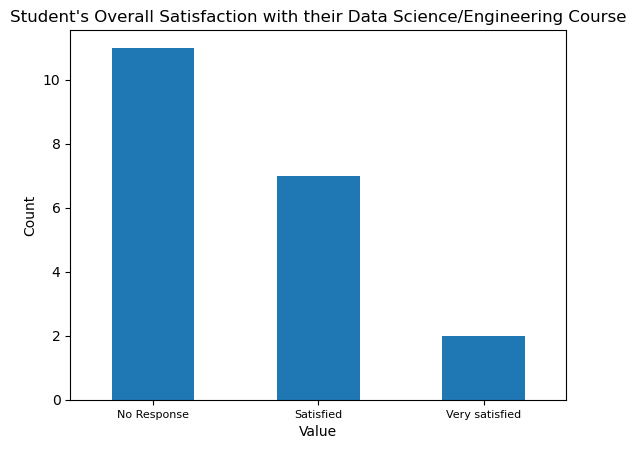

No Response       11
Satisfied          7
Very satisfied     2
Name: course_satisfaction, dtype: int64


In [105]:
satisfaction_count = pivoted_df['course_satisfaction'].value_counts()

# Plot the count in a bar graph
satisfaction = satisfaction_count.plot(kind='bar', rot=0) 
satisfaction.set_title('Student\'s Overall Satisfaction with their Data Science/Engineering Course')
satisfaction.set_xlabel('Value')
satisfaction.set_ylabel('Count')

# recruitment.set_xticklabels([text[:11] + '\n' + text[11:] for text in recruitment_count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=8)

plt.show()

print(satisfaction_count)

In [107]:
print(pivoted_df['course_title'].unique())

['Healthcare' 'B' 'No Response' 'A' 'Data Science' 'a. Data Science'
 'A. Data Science']


In [108]:
pivoted_df['course_title'] = pivoted_df['course_title'].replace({'a': 'Data Science', 'A': 'Data Science', 
                                                                 'a. Data Science': 'Data Science', 
                                                                 'A. Data Science': 'Data Science', 'Healthcare': 'Data Science',
                                                                 'b': 'Data Engineering', 'B': 'Data Engineering'})
print(pivoted_df['course_title'])

STUDENT_ID
829689559943479296         Data Science
872011308793471036     Data Engineering
880684860400873505          No Response
895700412106149899          No Response
907555122723319858          No Response
914658875834241054         Data Science
922614479542452284          No Response
932982740821872700         Data Science
1030009694212870144        Data Science
1037395744786747412         No Response
1040938229513343056         No Response
1064493525137371176         No Response
1064892608008167495        Data Science
1064902702372507698        Data Science
1065564948048138290        Data Science
1065568388115595284         No Response
1065924770442522674         No Response
1065948441353658388         No Response
1066024418087800892         No Response
1067383972499312671         No Response
Name: course_title, dtype: object


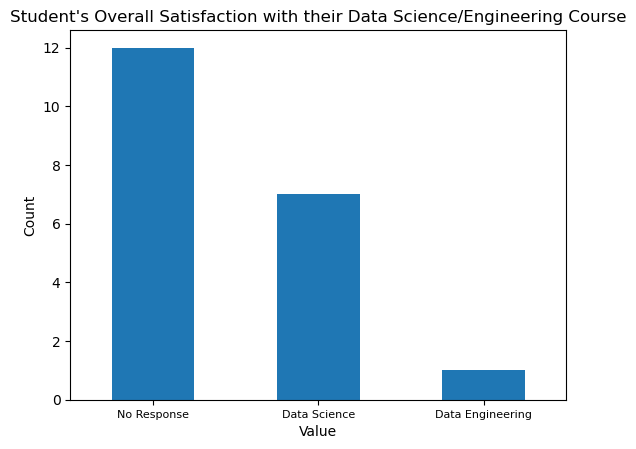

No Response         12
Data Science         7
Data Engineering     1
Name: course_title, dtype: int64


In [109]:
title_count = pivoted_df['course_title'].value_counts()

# Plot the count in a bar graph
course_title = title_count.plot(kind='bar', rot=0) 
course_title.set_title('Student\'s Overall Satisfaction with their Data Science/Engineering Course')
course_title.set_xlabel('Value')
course_title.set_ylabel('Count')

# recruitment.set_xticklabels([text[:11] + '\n' + text[11:] for text in recruitment_count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=8)

plt.show()

print(title_count)

In [111]:
print(pivoted_df['current_location'].unique())

['No Response' 'Lagos' 'Northern Cape' 'Lagos, Nigeria' 'Ibadan, Nigeria'
 'Abeokuta, Nigeria' 'Benin-City, Nigeria' 'Sure, Mavi' 'Ilorin, Nigeria'
 'Osogbo, Nigeria' 'Nigeria' 'Durban, South Africa']


In [113]:
pivoted_df['current_location'] = pivoted_df['current_location'].replace({'Lagos': 'Lagos, Nigeria', 
                                                                         'Northern Cape': 'Northern Cape, South Africa',
                                                                         'Sure, Mavi': 'Lagos, Nigeria', 
                                                                         'Nigeria': 'Lagos, Nigeria'})
print(pivoted_df['current_location'])

STUDENT_ID
829689559943479296                     No Response
872011308793471036                     No Response
880684860400873505                  Lagos, Nigeria
895700412106149899     Northern Cape, South Africa
907555122723319858                     No Response
914658875834241054                  Lagos, Nigeria
922614479542452284                 Ibadan, Nigeria
932982740821872700                  Lagos, Nigeria
1030009694212870144              Abeokuta, Nigeria
1037395744786747412            Benin-City, Nigeria
1040938229513343056                    No Response
1064493525137371176                 Lagos, Nigeria
1064892608008167495                Ilorin, Nigeria
1064902702372507698                    No Response
1065564948048138290                Osogbo, Nigeria
1065568388115595284                 Lagos, Nigeria
1065924770442522674           Durban, South Africa
1065948441353658388                    No Response
1066024418087800892                 Lagos, Nigeria
1067383972499312671 

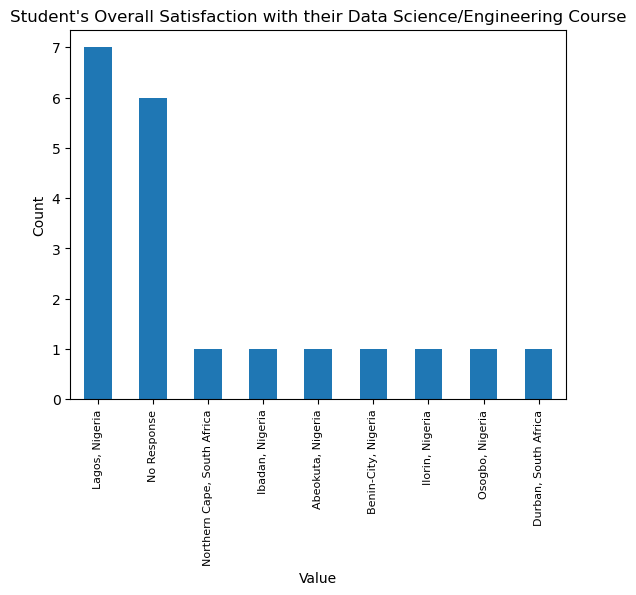

Lagos, Nigeria                 7
No Response                    6
Northern Cape, South Africa    1
Ibadan, Nigeria                1
Abeokuta, Nigeria              1
Benin-City, Nigeria            1
Ilorin, Nigeria                1
Osogbo, Nigeria                1
Durban, South Africa           1
Name: current_location, dtype: int64


In [125]:
location_count = pivoted_df['current_location'].value_counts()

# Plot the count in a bar graph
location = location_count.plot(kind='bar') 
# , rot=0
location.set_title('Student\'s Overall Satisfaction with their Data Science/Engineering Course')
location.set_xlabel('Value')
location.set_ylabel('Count')

recruitment.set_xticklabels([text[:6] + '\n' + text[6:] for text in recruitment_count.index])

# Wrap the labels
plt.xticks(ha='center', fontsize=8)
# rotation=0, 

plt.show()

print(location_count)

In [126]:
print(pivoted_df['education'].value_counts())

No Response        9
C                  2
b                  1
D                  1
d                  1
Ph.D.              1
Masters Degree     1
Master's Degree    1
G                  1
d. Bachelor's      1
A                  1
Name: education, dtype: int64


In [127]:
pivoted_df['education'] = pivoted_df['education'].replace({'a': 'High School', 'A': 'High School', 'b': 'Certificate', 
                                                           'B': 'Certificate', 'c': 'Diploma', 'C': 'Diploma', 
                                                           'd': 'Bachelor\'s', 'd. Bachelor\'s': 'Bachelor\'s', 'D': 'Bachelor\'s', 
                                                           'e': 'Degree', 'f': 'Master\'s Degree', 'Masters Degree': 'Master\'s Degree', 
                                                           'g': 'Ph.D.', 'G': 'Ph.D.', 'h': 'Other'})
print(pivoted_df['education'])

STUDENT_ID
829689559943479296         Certificate
872011308793471036         No Response
880684860400873505          Bachelor's
895700412106149899         No Response
907555122723319858          Bachelor's
914658875834241054             Diploma
922614479542452284         No Response
932982740821872700               Ph.D.
1030009694212870144    Master's Degree
1037395744786747412    Master's Degree
1040938229513343056        No Response
1064493525137371176        No Response
1064892608008167495              Ph.D.
1064902702372507698         Bachelor's
1065564948048138290        No Response
1065568388115595284        High School
1065924770442522674        No Response
1065948441353658388        No Response
1066024418087800892        No Response
1067383972499312671            Diploma
Name: education, dtype: object


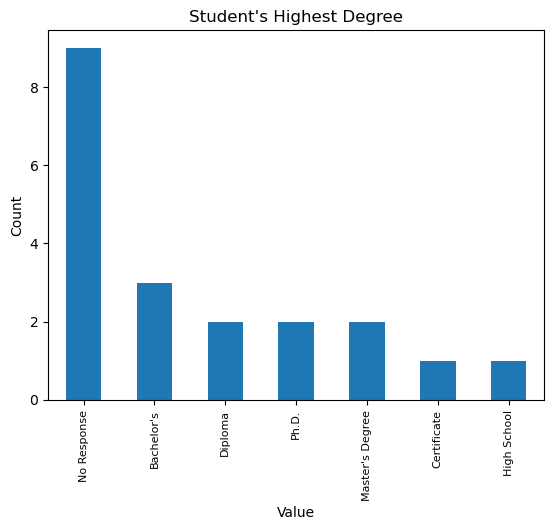

No Response        9
Bachelor's         3
Diploma            2
Ph.D.              2
Master's Degree    2
Certificate        1
High School        1
Name: education, dtype: int64


In [128]:
education_count = pivoted_df['education'].value_counts()

# Plot the count in a bar graph
education = education_count.plot(kind='bar') 
# , rot=0
education.set_title('Student\'s Highest Degree')
education.set_xlabel('Value')
education.set_ylabel('Count')

# recruitment.set_xticklabels([text[:6] + '\n' + text[6:] for text in recruitment_count.index])

# Wrap the labels
plt.xticks(ha='center', fontsize=8)
# rotation=0, 

plt.show()

print(education_count)

In [129]:
print(pivoted_df['employment_status'].value_counts())

No Response                9
C                          2
D                          2
Student                    1
e                          1
Self-employed              1
Option c                   1
c. Full-time employment    1
E                          1
B                          1
Name: employment_status, dtype: int64


In [134]:
pivoted_df['employment_status'] = pivoted_df['employment_status'].replace({'a': 'Student', 'b': 'Contract employment', 
                                                                           'B': 'Contract employment', 'c': 'Full-time employment', 
                                                                           'c. Full-time employment': 'Full-time employment', 
                                                                           'Option c': 'Full-time employment', 'C': 'Full-time employment',
                                                                           'd': 'Part time employment', 'D': 'Part time employment', 
                                                                           'e': 'Self-employed', 'E': 'Self-employed', 
                                                                           'Self-employed or freelancer': 'Self-employed', 'f': 'Other'})
print(pivoted_df['employment_status'])

STUDENT_ID
829689559943479296              No Response
872011308793471036              No Response
880684860400873505     Full-time employment
895700412106149899                  Student
907555122723319858              No Response
914658875834241054              No Response
922614479542452284            Self-employed
932982740821872700            Self-employed
1030009694212870144             No Response
1037395744786747412             No Response
1040938229513343056    Part time employment
1064493525137371176    Full-time employment
1064892608008167495    Part time employment
1064902702372507698             No Response
1065564948048138290    Full-time employment
1065568388115595284    Full-time employment
1065924770442522674             No Response
1065948441353658388           Self-employed
1066024418087800892     Contract employment
1067383972499312671             No Response
Name: employment_status, dtype: object


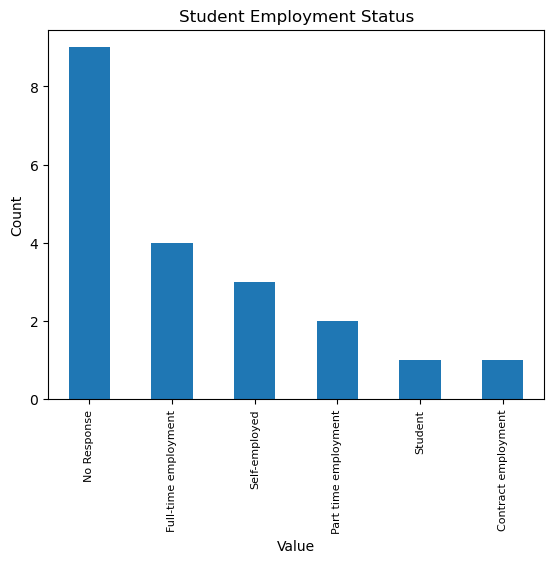

No Response             9
Full-time employment    4
Self-employed           3
Part time employment    2
Student                 1
Contract employment     1
Name: employment_status, dtype: int64


In [135]:
employment_count = pivoted_df['employment_status'].value_counts()

# Plot the count in a bar graph
employment = employment_count.plot(kind='bar') 
# , rot=0
employment.set_title('Student Employment Status')
employment.set_xlabel('Value')
employment.set_ylabel('Count')

# recruitment.set_xticklabels([text[:6] + '\n' + text[6:] for text in recruitment_count.index])

# Wrap the labels
plt.xticks(ha='center', fontsize=8)
# rotation=0, 

plt.show()

print(employment_count)

In [136]:
print(pivoted_df['favorite_app'].value_counts())

No Response                     10
D                                2
c                                1
I                                1
Twitter and Instagram            1
h. whatsapp                      1
Twitter \nYouTube \nWhatsApp     1
h. WhatsApp                      1
H                                1
Ac, h, i                         1
Name: favorite_app, dtype: int64


In [138]:
pivoted_df['favorite_app'] = pivoted_df['favorite_app'].replace({'a': 'Discord', 'b': 'Facebook', 'c': 'Google', 
                                                                 'd': 'Instagram', 'D': 'Instagram', 'e': 'Linkedin', 
                                                                 'f': 'Tiktok', 'g': 'Twitter', 'h': 'WhatsApp', 
                                                                 'h. whatsapp': 'WhatsApp', 'h. WhatsApp': 'WhatsApp', 
                                                                 'H': 'WhatsApp', 'i': 'YouTube', 'I': 'YouTube',
                                                                'Twitter and Instagram': 'Twitter, Instagram',
                                                                'Twitter \nYouTube \nWhatsApp': 'Twitter, YouTube, WhatsApp',
                                                                 'Ac, h, i': 'Discord, Google, WhatsApp, YouTube', 
                                                                 'Youtube': 'YouTube'})
print(pivoted_df['favorite_app'])

STUDENT_ID
829689559943479296                                 Google
872011308793471036                              Instagram
880684860400873505                            No Response
895700412106149899                            No Response
907555122723319858                            No Response
914658875834241054                                YouTube
922614479542452284                              Instagram
932982740821872700                     Twitter, Instagram
1030009694212870144                              WhatsApp
1037395744786747412                           No Response
1040938229513343056                           No Response
1064493525137371176                           No Response
1064892608008167495                           No Response
1064902702372507698            Twitter, YouTube, WhatsApp
1065564948048138290                              WhatsApp
1065568388115595284                              WhatsApp
1065924770442522674                           No Response
106

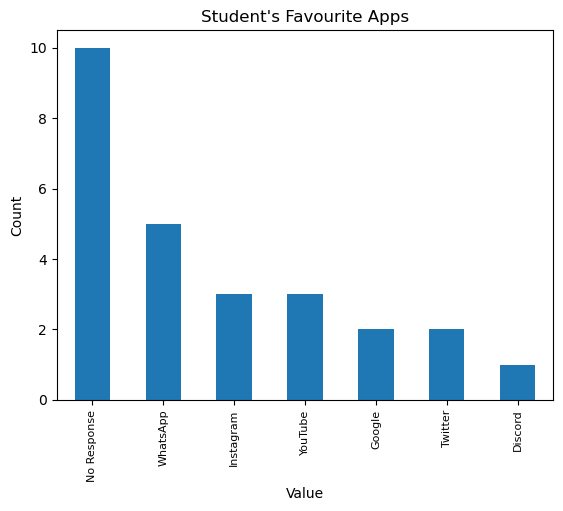

No Response    10
WhatsApp        5
Instagram       3
YouTube         3
Google          2
Twitter         2
Discord         1
dtype: int64


In [145]:
all_words = pivoted_df['favorite_app'].str.split(', ').sum()

app_word_count = pd.Series(all_words).value_counts()

# Plot the count in a bar graph
app = app_word_count.plot(kind='bar') 
# , rot=0
app.set_title('Student\'s Favourite Apps')
app.set_xlabel('Value')
app.set_ylabel('Count')

# recruitment.set_xticklabels([text[:6] + '\n' + text[6:] for text in recruitment_count.index])

# Wrap the labels
plt.xticks(ha='center', fontsize=8)
# rotation=0, 

plt.show()

print(app_word_count)


In [146]:
print(pivoted_df['heard_about_from'].value_counts())

No Response                  10
C                             3
B                             1
1                             1
Online search                 1
online search                 1
C. Referral from a friend     1
b. Social media               1
b                             1
Name: heard_about_from, dtype: int64


In [150]:
pivoted_df['heard_about_from'] = pivoted_df['heard_about_from'].replace({'a': 'Online search', 'online search': 'Online search', 
                                                                         1: 'Online search', 'b': 'Social media', 'B': 'Social media', 
                                                                         'b. Social media': 'Social media',
                                                                         'c': 'Referral', 'C': 'Referral', 
                                                                         'C. Referral from a friend': 'Referral', 
                                                                         'd': 'Email newsletter', 'D': 'Email newsletter', 
                                                                         'e': 'Other'})
print(pivoted_df['heard_about_from'])

STUDENT_ID
829689559943479296       No Response
872011308793471036       No Response
880684860400873505      Social media
895700412106149899       No Response
907555122723319858       No Response
914658875834241054     Online search
922614479542452284       No Response
932982740821872700     Online search
1030009694212870144    Online search
1037395744786747412      No Response
1040938229513343056         Referral
1064493525137371176      No Response
1064892608008167495         Referral
1064902702372507698         Referral
1065564948048138290     Social media
1065568388115595284         Referral
1065924770442522674      No Response
1065948441353658388      No Response
1066024418087800892      No Response
1067383972499312671     Social media
Name: heard_about_from, dtype: object


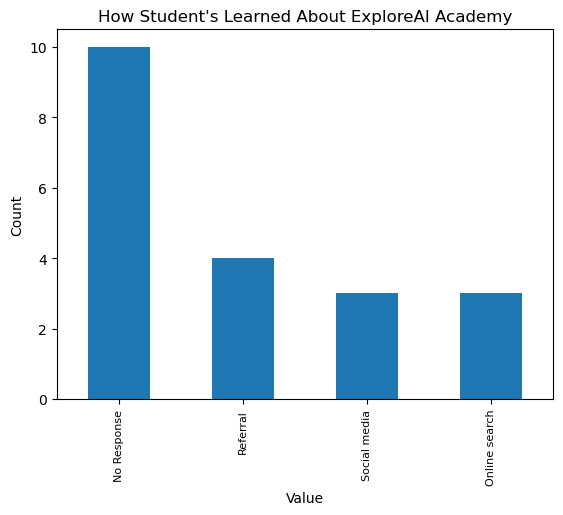

No Response      10
Referral          4
Social media      3
Online search     3
Name: heard_about_from, dtype: int64


In [151]:
heard_about_from_count = pivoted_df['heard_about_from'].value_counts()

# Plot the count in a bar graph
heard_about_from = heard_about_from_count.plot(kind='bar') 
# , rot=0
heard_about_from.set_title('How Student\'s Learned About ExploreAI Academy')
heard_about_from.set_xlabel('Value')
heard_about_from.set_ylabel('Count')

# recruitment.set_xticklabels([text[:6] + '\n' + text[6:] for text in recruitment_count.index])

# Wrap the labels
plt.xticks(ha='center', fontsize=8)
# rotation=0, 

plt.show()

print(heard_about_from_count)

In [152]:
print(pivoted_df['most_impactful_experience'].value_counts())

No Response                                       14
The meetings with moderators                       1
Thrive sessions & webinars                         1
Working hands-on in teams                          1
...new skills learnt                               1
The course materials and the test of knowledge     1
b. Likely                                          1
Name: most_impactful_experience, dtype: int64


In [156]:
pivoted_df['most_impactful_experience'] = pivoted_df['most_impactful_experience'].replace({'The meetings with moderators': 'Webiners', 
                                                                        'Thrive sessions & webinars': 'Thrive, Webinars',
                                                                        'Working hands-on in teams': 'New practical skills learned, Working in teams',
                                                                        '...new skills learnt': 'New practical skills learned',
                                                                        'The course materials and the test of knowledge': 'Course materials, New practical skills learned',
                                                                        'b. Likely': 'New practical skills learned', 
                                                                                          'Webiners': 'Webinars'})
print(pivoted_df['most_impactful_experience'])

STUDENT_ID
829689559943479296                                        No Response
872011308793471036                                        No Response
880684860400873505                                           Webinars
895700412106149899                                        No Response
907555122723319858                                   Thrive, Webinars
914658875834241054                                        No Response
922614479542452284                                        No Response
932982740821872700     New practical skills learned, Working in teams
1030009694212870144                      New practical skills learned
1037395744786747412                                       No Response
1040938229513343056                                       No Response
1064493525137371176                                       No Response
1064892608008167495    Course materials, New practical skills learned
1064902702372507698                                       No Response
106556494

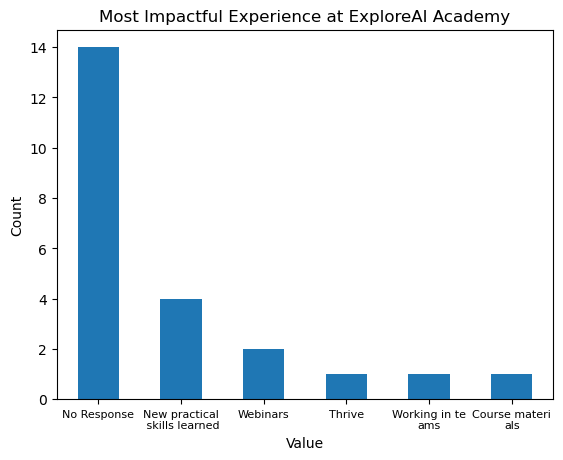

No Response                     14
New practical skills learned     4
Webinars                         2
Thrive                           1
Working in teams                 1
Course materials                 1
dtype: int64


In [173]:
all_phrases = pivoted_df['most_impactful_experience'].str.split(', ').sum()

phrase_count = pd.Series(all_phrases).value_counts()

# Plot the count in a bar graph
phrases = phrase_count.plot(kind='bar') 
# , rot=0
phrases.set_title('Most Impactful Experience at ExploreAI Academy')
phrases.set_xlabel('Value')
phrases.set_ylabel('Count')

phrases.set_xticklabels([text[:13] + '\n' + text[13:] for text in phrase_count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=8)
#  

plt.show()

print(phrase_count)


In [159]:
print(pivoted_df['motivation_factors'].value_counts())

No Response                            14
change in career, personal interest     1
d                                       1
A                                       1
a. change in career                     1
b                                       1
a                                       1
Name: motivation_factors, dtype: int64


In [160]:
pivoted_df['motivation_factors'] = pivoted_df['motivation_factors'].replace({'a': 'Change in career', 'A': 'Change in career', 
                                                                             'a. change in career': 'Change in career', 
                                                                             'b': 'Make more money', 
                                                                             'c': 'Improve existing knowledge', 
                                                                             'd': 'Learn a new skill', 'e': 'Job requirement', 
                                                                             'f': 'Personal interest', 'g': 'Promotion', 
                                                                             'h': 'Others', 
                                                                             'change in career, personal interest': 'Change in career, Personal interest'})
print(pivoted_df['motivation_factors'])

STUDENT_ID
829689559943479296                             No Response
872011308793471036                             No Response
880684860400873505                             No Response
895700412106149899     Change in career, Personal interest
907555122723319858                       Learn a new skill
914658875834241054                        Change in career
922614479542452284                             No Response
932982740821872700                             No Response
1030009694212870144                       Change in career
1037395744786747412                            No Response
1040938229513343056                            No Response
1064493525137371176                        Make more money
1064892608008167495                            No Response
1064902702372507698                            No Response
1065564948048138290                            No Response
1065568388115595284                            No Response
1065924770442522674                          

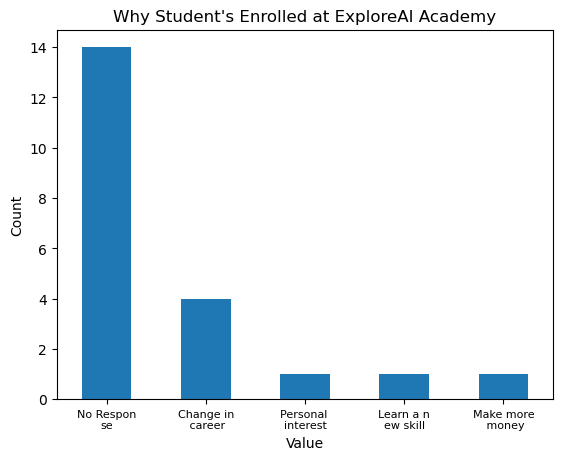

No Response          14
Change in career      4
Personal interest     1
Learn a new skill     1
Make more money       1
dtype: int64


In [172]:
mtv_phrases = pivoted_df['motivation_factors'].str.split(', ').sum()

mtv_phrase_count = pd.Series(mtv_phrases).value_counts()

# Plot the count in a bar graph
mtv_phrases = mtv_phrase_count.plot(kind='bar') 
# #, rot=0
mtv_phrases.set_title('Why Student\'s Enrolled at ExploreAI Academy')
mtv_phrases.set_xlabel('Value')
mtv_phrases.set_ylabel('Count')

mtv_phrases.set_xticklabels([text[:9] + '\n' + text[9:] for text in mtv_phrase_count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=8)
 

plt.show()

print(mtv_phrase_count)


In [174]:
print(pivoted_df['program_plan'].value_counts())

No Response    11
AC              7
FT              2
Name: program_plan, dtype: int64


In [164]:
pivoted_df['program_plan'] = pivoted_df['program_plan'].replace({'a': 'FT', 'b': 'AC', 'B': 'AC', 'b. AC': 'AC', 
                                                                 'c': 'Self sponsored', 'd': 'Paid scholarship'})
print(pivoted_df['program_plan'])

STUDENT_ID
829689559943479296     No Response
872011308793471036     No Response
880684860400873505              AC
895700412106149899              FT
907555122723319858     No Response
914658875834241054     No Response
922614479542452284              AC
932982740821872700              AC
1030009694212870144    No Response
1037395744786747412    No Response
1040938229513343056    No Response
1064493525137371176    No Response
1064892608008167495             AC
1064902702372507698             AC
1065564948048138290             AC
1065568388115595284             AC
1065924770442522674    No Response
1065948441353658388    No Response
1066024418087800892    No Response
1067383972499312671             FT
Name: program_plan, dtype: object


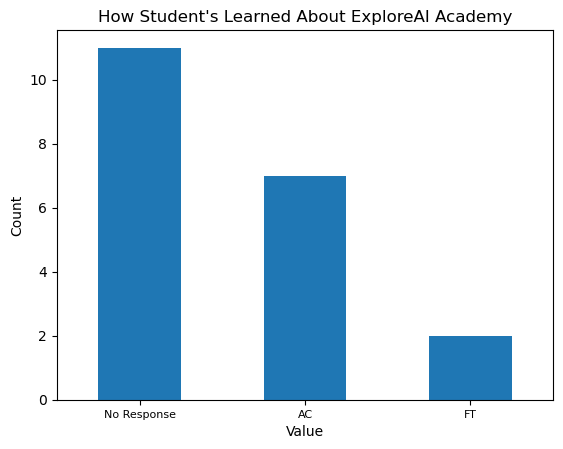

No Response    11
AC              7
FT              2
Name: program_plan, dtype: int64


In [166]:
plan_count = pivoted_df['program_plan'].value_counts()

# Plot the count in a bar graph
plan = plan_count.plot(kind='bar', rot=0) 

plan.set_title('How Student\'s Learned About ExploreAI Academy')
plan.set_xlabel('Value')
plan.set_ylabel('Count')

# recruitment.set_xticklabels([text[:6] + '\n' + text[6:] for text in recruitment_count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=8)
 

plt.show()

print(plan_count)

In [175]:
print(pivoted_df['relaxation_mode'].value_counts())

No Response             14
Watch a movie            1
C                        1
watch movies or read     1
browsing                 1
Playing game             1
Relaxation               1
Name: relaxation_mode, dtype: int64


In [179]:
pivoted_df['relaxation_mode'] = pivoted_df['relaxation_mode'].replace({'Watch a movie': 'Watch movies', 
                                                                       'watch movies or read': 'Watch movies, Read', 
                                                                       'C': 'Watch movies', 'browsing': 'Internet surfing',
                                                                      'Playing game': 'Video games'})
print(pivoted_df['relaxation_mode'])

STUDENT_ID
829689559943479296            No Response
872011308793471036            No Response
880684860400873505            No Response
895700412106149899            No Response
907555122723319858            No Response
914658875834241054           Watch movies
922614479542452284           Watch movies
932982740821872700     Watch movies, Read
1030009694212870144      Internet surfing
1037395744786747412           No Response
1040938229513343056           No Response
1064493525137371176           No Response
1064892608008167495           No Response
1064902702372507698           No Response
1065564948048138290           Video games
1065568388115595284            Relaxation
1065924770442522674           No Response
1065948441353658388           No Response
1066024418087800892           No Response
1067383972499312671           No Response
Name: relaxation_mode, dtype: object


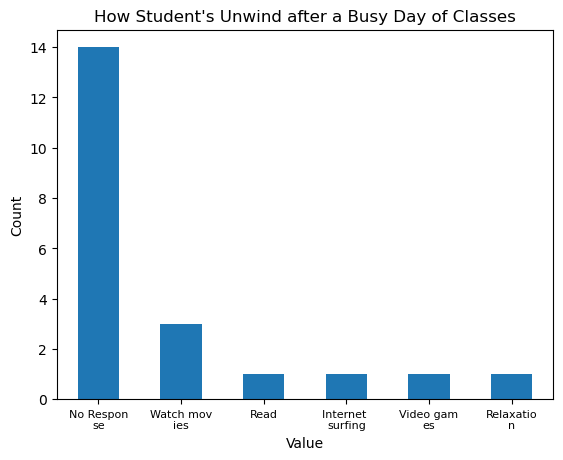

No Response         14
Watch movies         3
Read                 1
Internet surfing     1
Video games          1
Relaxation           1
dtype: int64


In [183]:
relax_phrases = pivoted_df['relaxation_mode'].str.split(', ').sum()

relax_phrase_count = pd.Series(relax_phrases).value_counts()

# Plot the count in a bar graph
relax_phrases = relax_phrase_count.plot(kind='bar') 
# #, rot=0
relax_phrases.set_title('How Student\'s Unwind after a Busy Day of Classes')
relax_phrases.set_xlabel('Value')
relax_phrases.set_ylabel('Count')

relax_phrases.set_xticklabels([text[:9] + '\n' + text[9:] for text in relax_phrase_count.index])

# Wrap the labels
plt.xticks(rotation=0, ha='center', fontsize=8)
 

plt.show()

print(relax_phrase_count)


In [184]:
print(pivoted_df)

Question_Title                            access_to_additional_support  \
STUDENT_ID                                                               
829689559943479296                                     Yes. I am aware   
872011308793471036   I have limited awareness and would like more i...   
880684860400873505   I have limited awareness and would like more i...   
895700412106149899                                         No Response   
907555122723319858                                         No Response   
914658875834241054   I have limited awareness and would like more i...   
922614479542452284                                  No. I am not aware   
932982740821872700                                  No. I am not aware   
1030009694212870144                                 No. I am not aware   
1037395744786747412                                        No Response   
1040938229513343056                                        No Response   
1064493525137371176                   

In [189]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
import pandas as pd

# Authenticate with Google Sheets
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(r'C:\Users\Hp\Downloads\explore-sed-e91f95f5477f.json', scope)
gc = gspread.authorize(creds)

# Open the Google Sheet
Mavis_Records = "exploreSED"
cleaned_data = gc.open(Mavis_Records).worksheet('Cleaned_ANS')

# Clear the worksheet
cleaned_data.clear()

# Copy the DataFrame to avoid modifying the original
trans_df = pivoted_df.copy()

# Reset the index to make 'STUDENT_ID' a regular column
trans_df.reset_index(inplace=True)

# Convert 'STUDENT_ID' to string in the DataFrame
trans_df['STUDENT_ID'] = trans_df['STUDENT_ID'].astype(str)

# Convert the DataFrame to a list of lists
data = trans_df.values.tolist()

data_with_header = [trans_df.columns.tolist()] + data
cleaned_data.insert_rows(data_with_header, 1)



{'spreadsheetId': '1I9rRt7X7yIcj7MkBJKOWhRmBrFlv6M1HqtSmZka2n-4',
 'updates': {'spreadsheetId': '1I9rRt7X7yIcj7MkBJKOWhRmBrFlv6M1HqtSmZka2n-4',
  'updatedRange': 'Cleaned_ANS!A1:Q21',
  'updatedRows': 21,
  'updatedColumns': 17,
  'updatedCells': 357}}

In [196]:
cat_df = trans_df.copy()

# Create a cross-tabulation table for two categorical columns
cross_tab = pd.crosstab(cat_df['course_satisfaction'], cat_df['age'])

print("Cross-Tabulation Table:")
print(cross_tab)

Cross-Tabulation Table:
age                  21-25  26-30  31-35  36-40  46-50  56-60  No Response
course_satisfaction                                                       
No Response              1      1      1      1      1      1            5
Satisfied                0      2      1      1      0      0            3
Very satisfied           0      2      0      0      0      0            0


In [201]:
from scipy.stats import chi2_contingency

chi_sq = trans_df.copy()

# Create a contingency table between two categorical columns
contingency_table = pd.crosstab(chi_sq['employment_status'], chi_sq['age'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

# Determine whether the result is statistically significant
alpha = 0.05  
if p < alpha:
    print("There is a significant association between course satisfaction and age.")
else:
    print("There is no significant association between course satisfaction and age.")

Chi-square statistic: 24.86111111111111
p-value: 0.7317531134999542
There is no significant association between course satisfaction and age.


In [205]:
import numpy as np

chi_sq_df = trans_df.copy()

# Create a contingency table between two categorical columns
contingency_table = pd.crosstab(chi_sq_df['course_satisfaction'], chi_sq_df['current_location'])

# Perform the chi-square test
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()  # Total number of observations
min_dim = min(contingency_table.shape) - 1  # Number of categories minus 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print("Cramer's V:", cramer_v)

Cramer's V: 0.7077624204383747
